### We use logistic regression to predict whether a person survived on the Titanic.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
#from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

In [2]:
trainraw = pd.read_csv('train.csv')
trainraw['label'] = 'train'
trainraw.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'label'],
      dtype='object')

In [3]:
testraw = pd.read_csv('test.csv')
testraw['label'] = 'test'
testraw['Survived'] = np.nan
testraw.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'label', 'Survived'],
      dtype='object')

In [4]:
dt = pd.concat([trainraw, testraw])

In [5]:
dt['NFamily'] = dt['SibSp'] + dt['Parch']
dt['HasFamily'] = dt['NFamily'].apply(lambda x: 1 if x > 0 else 0)

embarked = pd.get_dummies(dt['Embarked'], prefix = 'Embarked', drop_first = True)
pclass = pd.get_dummies(dt['Pclass'], prefix = 'Pclass', drop_first = True)
dt['Embarked_Q'] = embarked['Embarked_Q']
dt['Embarked_S'] = embarked['Embarked_S']
dt['Pclass_2'] = pclass['Pclass_2']
dt['Pclass_3'] = pclass['Pclass_3']
dt['Sex'] = dt['Sex'].apply(lambda x: 1 if x == 'male' else 0)

dt = dt.drop(columns = ['Name', 'Ticket', 'Cabin'])

In [6]:
dt.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label,NFamily,HasFamily,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0.0,3,1,22.0,1,0,7.2500,S,train,1,1,0,1,0,1
1,2,1.0,1,0,38.0,1,0,71.2833,C,train,1,1,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,S,train,0,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,53.1000,S,train,1,1,0,1,0,0
4,5,0.0,3,1,35.0,0,0,8.0500,S,train,0,0,0,1,0,1


In [7]:
train = dt[dt['label'] == 'train']
test = dt[dt['label'] == 'test']

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NFamily,HasFamily,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.904602,0.397306,0.086420,0.722783,0.206510,0.551066
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615,0.281141,0.447876,0.405028,0.497665
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
test.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NFamily,HasFamily,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,418.000000,0.0,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,NaN,2.265550,0.636364,30.272590,0.447368,0.392344,35.627188,0.839713,0.394737,0.110048,0.645933,0.222488,0.521531
std,120.810458,NaN,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,1.519072,0.489380,0.313324,0.478803,0.416416,0.500135
min,892.000000,NaN,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,NaN,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1100.500000,NaN,3.000000,1.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1204.750000,NaN,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1309.000000,NaN,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
def plotHistogram(variable):
    
    plt.figure()
    plt.hist(variable)
    plt.show()

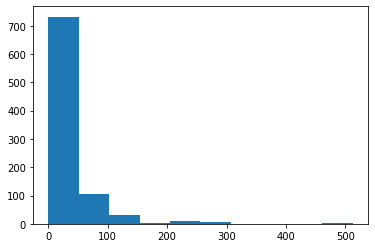

In [11]:
plotHistogram(train['Fare'].dropna())

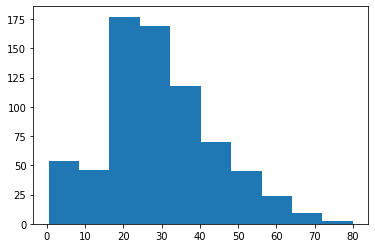

In [12]:
plotHistogram(train['Age'].dropna())

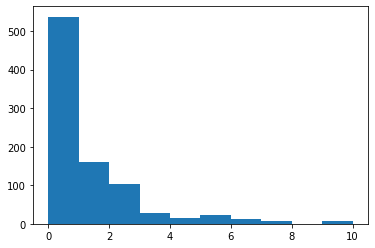

In [13]:
plotHistogram(train['NFamily'].dropna())

In [14]:
train.groupby(['Sex']).agg({'Survived': 'mean'})

,Survived
Sex,
0,0.742038
1,0.188908


* We see that females had a much higher survival rate than males.

## Many age values are missing. Thus, it makes sense to impute age.

In [15]:
train[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [16]:
def impute_age(Pclass, age):
    
    if np.isnan(age):
        
        if Pclass == 1:

            return 38

        elif Pclass == 2:

            return 30

        elif Pclass == 3:

            return 25
        
    else:
        
        return age
    
def age_bin(x):
    
    if x < 10:
        
        return 0
    
    else:
        
        return 1

In [17]:
AgeImputed = []
for i in range(0, dt.shape[0]):
    
    AgeImputed.append(impute_age(dt['Pclass'].iloc[i], dt['Age'].iloc[i]))
    
dt['Age'] = AgeImputed
dt['AgeBin'] = dt['Age'].apply(lambda x: age_bin(x))
train = dt[dt['label'] == 'train']
test = dt[dt['label'] == 'test']

In [18]:
train.groupby(['AgeBin']).agg({'Survived': 'mean'})

,Survived
AgeBin,
0,0.612903
1,0.366707


* Younger people were more likely to survive than older people.

In [19]:
variables = ['Pclass_2', 'Pclass_3', 'Sex', 'AgeBin', 'HasFamily', 'Embarked_Q', 'Embarked_S']
y = train['Survived']
X = np.array(train[variables])
print(X.shape, y.shape)

(891, 7) (891,)


### We first try Logistic Regression.

In [20]:
clf1 = LogisticRegression(random_state = 1, C = 0.8, max_iter = 500).fit(X, y)
print(clf1.score(X, y))

0.8002244668911336


In [21]:
clf1.fit(X, y)

LogisticRegression(C=0.8, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### The training accuracy is only 80%. 

In [22]:
Xtest = np.array(test[variables])
pred1 = clf1.predict(Xtest)

In [23]:
testlabeled = test[variables].copy()
testlabeled['Survived1'] = pred1
testlabeled.head()

,Pclass_2,Pclass_3,Sex,AgeBin,HasFamily,Embarked_Q,Embarked_S,Survived1
0,0,1,1,1,0,1,0,0.0
1,0,1,0,1,1,0,1,0.0
2,1,0,1,1,0,1,0,0.0
3,0,1,1,1,0,0,1,0.0
4,0,1,0,1,1,0,1,0.0


In [24]:
testlabeled.groupby('Sex').agg({'Survived1': 'mean'})

,Survived1
Sex,
0,0.868421
1,0.048872


In [25]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred1

   PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       0.0
3          895       0.0
4          896       0.0
(418, 2)


In [26]:
submission['Survived'] = submission['Survived'].astype(int)

In [27]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [29]:
submission.to_csv('submission1.csv', index = False)

### We now try to implement a decision tree.

In [30]:
clf2 = tree.DecisionTreeClassifier()
clf2.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
pred2 = clf2.predict(Xtest)
testlabeled['Survived2'] = pred2

In [32]:
testlabeled.groupby('Sex').agg({'Survived2': 'mean'})

,Survived2
Sex,
0,0.703947
1,0.018797


In [33]:
error = np.mean(np.abs(clf2.predict(X) - y))
print(1 - error)

0.8271604938271605


In [34]:
np.sum(testlabeled['Survived1'] != testlabeled['Survived2'])

41

### Submission

In [38]:
submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = pred2
submission['Survived'] = submission['Survived'].astype(int)

In [40]:
submission.to_csv('submission2.csv', index = False)